In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
import corner

https://emcee.readthedocs.io/en/stable/

In [2]:
def Likelihood(p,r,n):
    L = p**r*(1-p)**(n-r)
    return L

In [3]:
def LogPrior(p):
    
    if 0 < p < 1:
        return 0.
    else:
        return -np.inf

In [4]:
r = 7
n = 10

In [8]:
def LogPosterior(p,r,n):
    
    LogP = LogPrior(p)
    
    if not np.isfinite(LogP):
        return -np.inf
    else:
        return LogP + np.log(Likelihood(p,r,n))

In [10]:
LogPosterior(1.5,r,n)

-inf

In [21]:
n_walkers, n_params = 4, 1
p0 = np.random.rand(n_walkers,n_params)
#p0

In [24]:
sampler = emcee.EnsembleSampler( n_walkers, n_params, LogPosterior, args=[r,n] )
pos,prob,state,_=sampler.run_mcmc(p0,5000,progress=True)

100%|██████████████████████████████████████████████████████████| 5000/5000 [00:07<00:00, 653.87it/s]


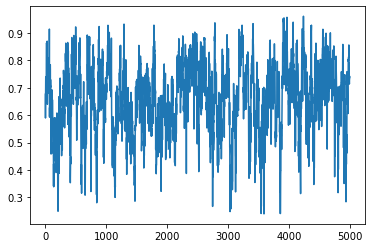

In [25]:
samples = sampler.get_chain()
plt.plot(samples[:,0])

(array([  43.,  102.,  214.,  438.,  841.,  943., 1071.,  836.,  408.,
         104.]),
 array([0.23927642, 0.31146801, 0.3836596 , 0.4558512 , 0.52804279,
        0.60023438, 0.67242598, 0.74461757, 0.81680916, 0.88900076,
        0.96119235]),
 <BarContainer object of 10 artists>)

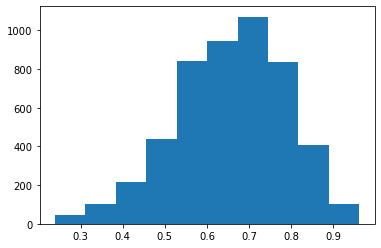

In [26]:
plt.hist(samples[:,0])

In [27]:
flat_samples = sampler.get_chain(discard = 100, thin=15,flat =True)
truths=np.percentile(pos,50,axis=0)
truths

array([0.68239929])

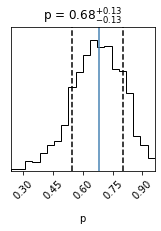

In [29]:
labels=['p']
figure = corner.corner( flat_samples, \
                       truths=truths, \
                     labels=labels, \
                      quantiles=[0.16,0.84],
                      show_titles=True) 